# Mall Customers Segmentation - Age / Annual Income($k)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv ('Mall_Customers.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0,0.5,'Annual Income (k$)')

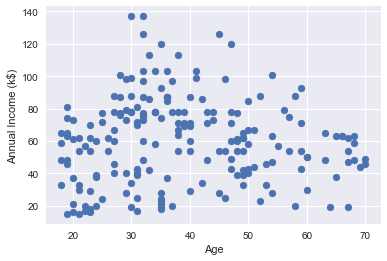

In [5]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

In [6]:
data = data[['Age','Annual Income (k$)']]

data.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [7]:
x = data.copy()

In [24]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

clusters.head()

,Age,Annual Income (k$),cluster_pred
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1


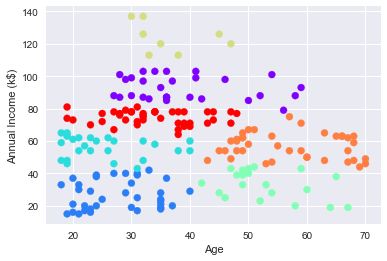

In [26]:
plt.scatter(clusters['Age'],clusters['Annual Income (k$)'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.show()

In [12]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)


In [13]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[400.0,
 250.58811570754693,
 132.8553042122192,
 103.04951818194573,
 81.36230859173125,
 68.36128254457965,
 54.18610091616842,
 47.93219646465747,
 41.9052051857605]

Text(0,0.5,'WCSS')

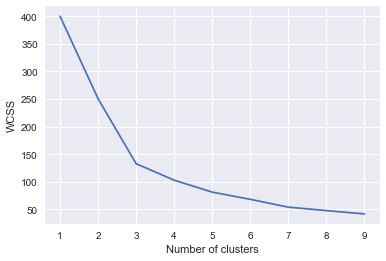

In [14]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# MALL CUSTOMER SEGMENTATION ANALYSIS WITH K MEANS CLUSTER CONCLUSION

__From my exploration on the different features this dataset offers, K for Clustering is the go to choice to segment the mall customers and reveal some valuable insights since featured plotted seem scattered__

__So far, the knowledge I have gained from this data set using cluster analysis on different targets choses I have found that The Malls Spending Score that they assign to customers based on their spending activity within the mall shows that customers between the Ages of 20 - 40 have the highest Spending Points. A considerbly large percentage of older customers, aged 50 >, fall below 50% of the Spending Score.__

__Below are TWO important questions arose from this exploration of the data:__, 

__Why do younger customers have higher Spending Points? Are younger customers aged between 20 - 40 earning more than the elderly customers explaining their higher Spending Points?__

__From my first explorative analysis using K Means I found FIVE distinct clusters:__ 

- High Spending Points - Low Annual Income
- Low Spending Points - Low Annual Income
- High Annual Income - High Spending Points
- High Annual Income - Low Spending Points
- Average Annual Income - Average Spending Points

__These two question are easily asnwered by exploring the data again but plotting the Age of Customers against their Annual incomes and using cluster analyisis method I used before to identify the distint differences between clusters and simmilarity within the clusters revealing how the annual income is distributed amongst these customers__

__After doing this, I found out something interesting, The customers with the highest Annual Income fall between the ages of 30 - 50, which kind of explains why the highest Spending Points fall between the ages of 20-40. But we are not done. Highest Spending Points falls between the ages of 20 - 40, yet the highest earning cluster falls between the age of 30 - 50. Where are the 20 - 30 years old with high Spending Points? and why are some older customers between the ages of 40 - 50 who are part of the highest Annual Income cluster yet are grouped in cluster with an average to below average Spending Points.__ 

__The dataset does not contain much more to go on for exploration sake, so, using intuition, I would guess that the mall has many shops/restuarants/pubs/promotions that are more attractive to younger customers aged 20 - 40 and most of these shops are not very expensive which explains why many young customers aged 20 - 30 who are grouped in the cluster of Below Average to Very Low Annual Income still make up a large percentage of young customers aged 20 - 40 with high Spending Points. The group aged 30 - 40 years who are part of the cluster of highest Annual Salary also fall into the cluster of high Spending Scores. I would suggest that the mall, as much I've stated earlier that has shops/restuarants/pubs/promotions that appeal to the younger age group the mall may also have good family spaces/ events cause such an Age with high annual income must be a family unit. But this is all intuitive conclusions from my exploration on the dataset since cluster analysis is just mainly for explorative analysis than confirmation or predictive.__